<a href="https://colab.research.google.com/github/peeyushsinghal/EVA8/blob/main/EVA8/S13-Assignment-Solution/EVA8_S13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [38]:
import torch
from torchvision import datasets,transforms
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt # for visualizing images
import random
from PIL import Image
import os
import torchvision.utils as vutils


### Seed and Cuda

In [4]:
# check for cuda
cuda = torch.cuda.is_available()
print (f' Cuda Status : {cuda}')

# setting seed
SEED = 42 # arbit seed, why 42 - because in hitch hikers guide to galaxy it is answer to everything
# torch.cuda.seed(SEED) 
torch.cuda.manual_seed_all(SEED) if cuda else torch.manual_seed(SEED)

 Cuda Status : False


In [5]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      transforms.Resize((224,224)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                      #  transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                      transforms.ToTensor()
                                      , # converts to tesnor
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      transforms.Resize((224,224)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor()
                                       ,# converts to tesnor
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                       ])

target_transform = transforms.Compose([
                                      transforms.Resize((224,224)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor()
                                      #  ,# converts to tesnor
                                      #  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                       ])

In [6]:

train = datasets.OxfordIIITPet('./data', # directory where data needs to be stored
                       split='trainval', # get the training portion of the dataset
                       target_types = 'segmentation', # get segmentation 
                       download=True, # downloads
                       transform=train_transforms, # transformation on original image
                       target_transform=target_transform) # do transformation on mask also
test = datasets.OxfordIIITPet('./data', 
                      split='test',
                      target_types = 'segmentation',
                      download=True, 
                      transform=test_transforms,
                      target_transform=target_transform)

100%|██████████| 791918971/791918971 [00:25<00:00, 31316104.10it/s]


Extracting data/oxford-iiit-pet/images.tar.gz to data/oxford-iiit-pet


100%|██████████| 19173078/19173078 [00:01<00:00, 16091792.20it/s]


Extracting data/oxford-iiit-pet/annotations.tar.gz to data/oxford-iiit-pet


In [ ]:
def show_img(img_obj, mask= False):
  
  img_obj = img_obj.permute(1,2,0).numpy()
  
  if not mask:
    # Denormalize the image, not required for mask
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    img_obj = std * img_obj + mean
  
  plt.imshow(img_obj)
  plt.show()

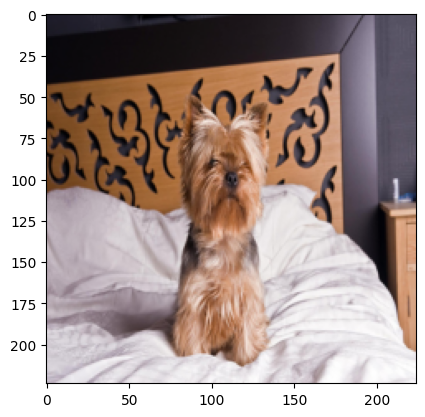

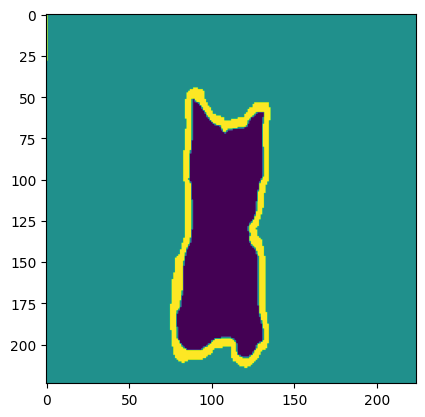

(None, None)

In [26]:
t = random.randint(0, len(train)) # random image
sample_image, sample_mask = train[t]
show_img(sample_image), show_img(sample_mask, mask= True)

In [27]:
dataloader_args = dict(shuffle=True, batch_size=32, num_workers=4, pin_memory = True) if cuda else dict(shuffle=True, batch_size=64)

train_loader = torch.utils.data.DataLoader(
    dataset=train,# train dataset
    **dataloader_args # the dataloader arguments change dependent on cuda is available or not
    )

test_loader = torch.utils.data.DataLoader(
    dataset = test,# test dataset 
    **dataloader_args # the dataloader arguments change dependent on cuda is available or not
)

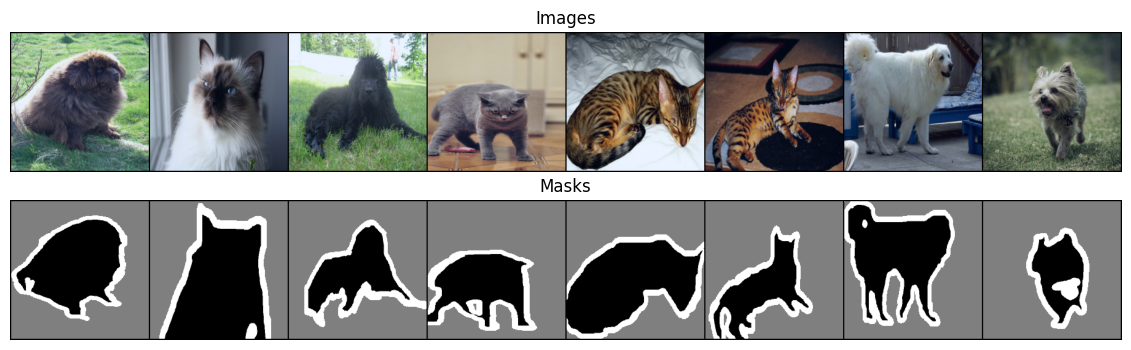

In [57]:
import matplotlib.gridspec as gridspec

def show_grid_images(dataloader):
  images, masks = next(iter(dataloader))
  
  # creating image grid
  grid_images = vutils.make_grid(images[:8],nrow=8,normalize=True)
  # Convert the grid to a numpy array
  grid_images = grid_images.cpu().numpy().transpose((1, 2, 0)) 

  # creating mask grid
  grid_masks = vutils.make_grid(masks[:8],nrow=8,normalize=True)
  # Convert the grid to a numpy array
  grid_masks = grid_masks.cpu().numpy().transpose((1, 2, 0))   
  
  # Create a gridspec with 2 rows and 1 column
  fig = plt.figure(figsize=(16, 4))
  gs = gridspec.GridSpec(2, 1, figure=fig)

  # Display the first grid of images in the first row with a title
  ax1 = fig.add_subplot(gs[0, :])
  ax1.imshow(grid_images)
  ax1.axis('off')
  ax1.set_title('Images')

  # Display the second grid of images in the second row with a title
  ax2 = fig.add_subplot(gs[1, :])
  ax2.imshow(grid_masks)
  ax2.axis('off')
  ax2.set_title('Masks')

  # Show the figure
  plt.show()


show_grid_images(train_loader)